# Explore here

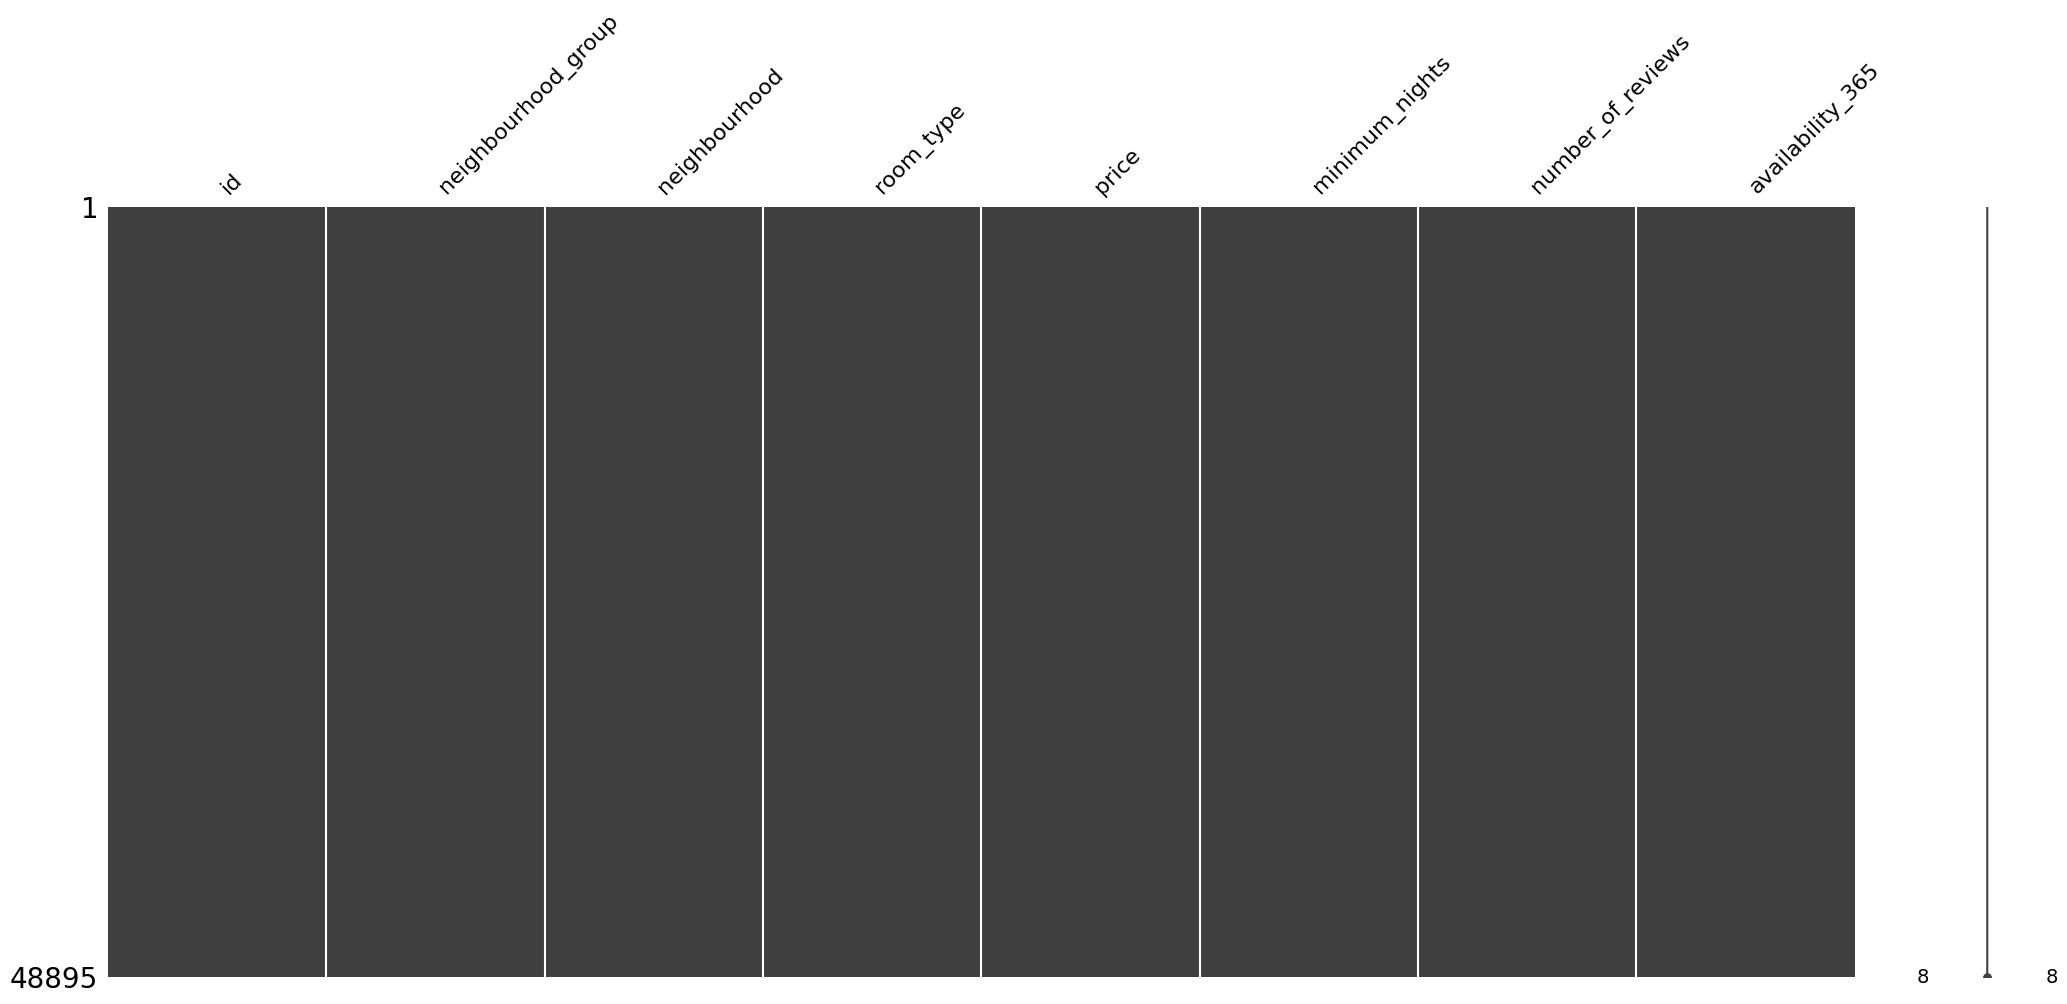

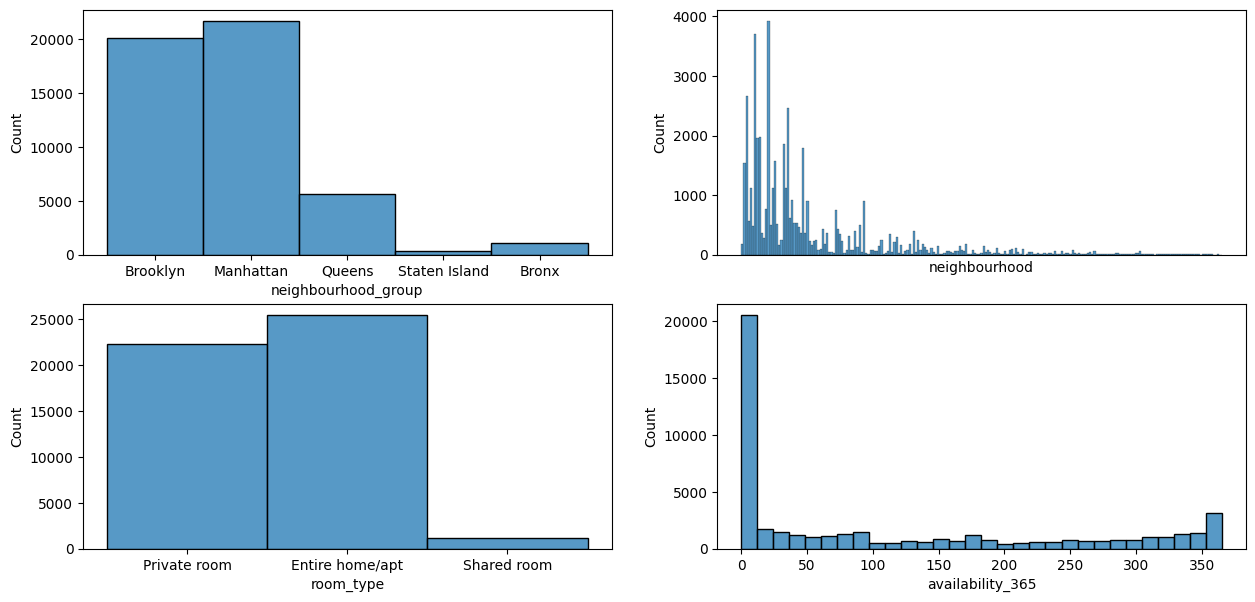

/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


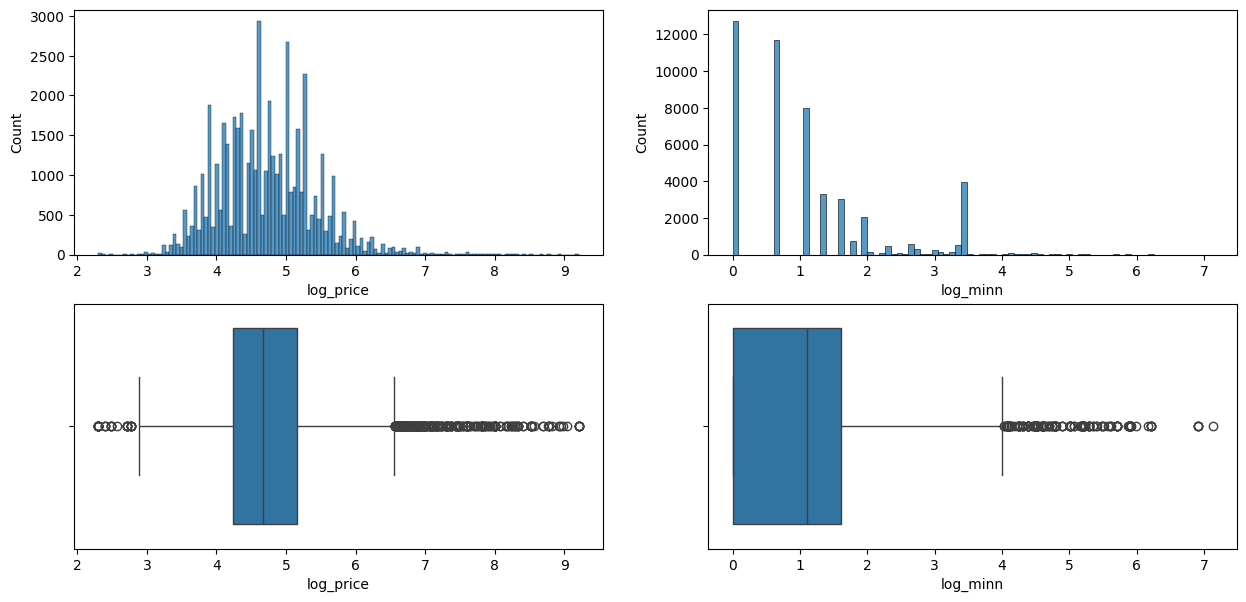

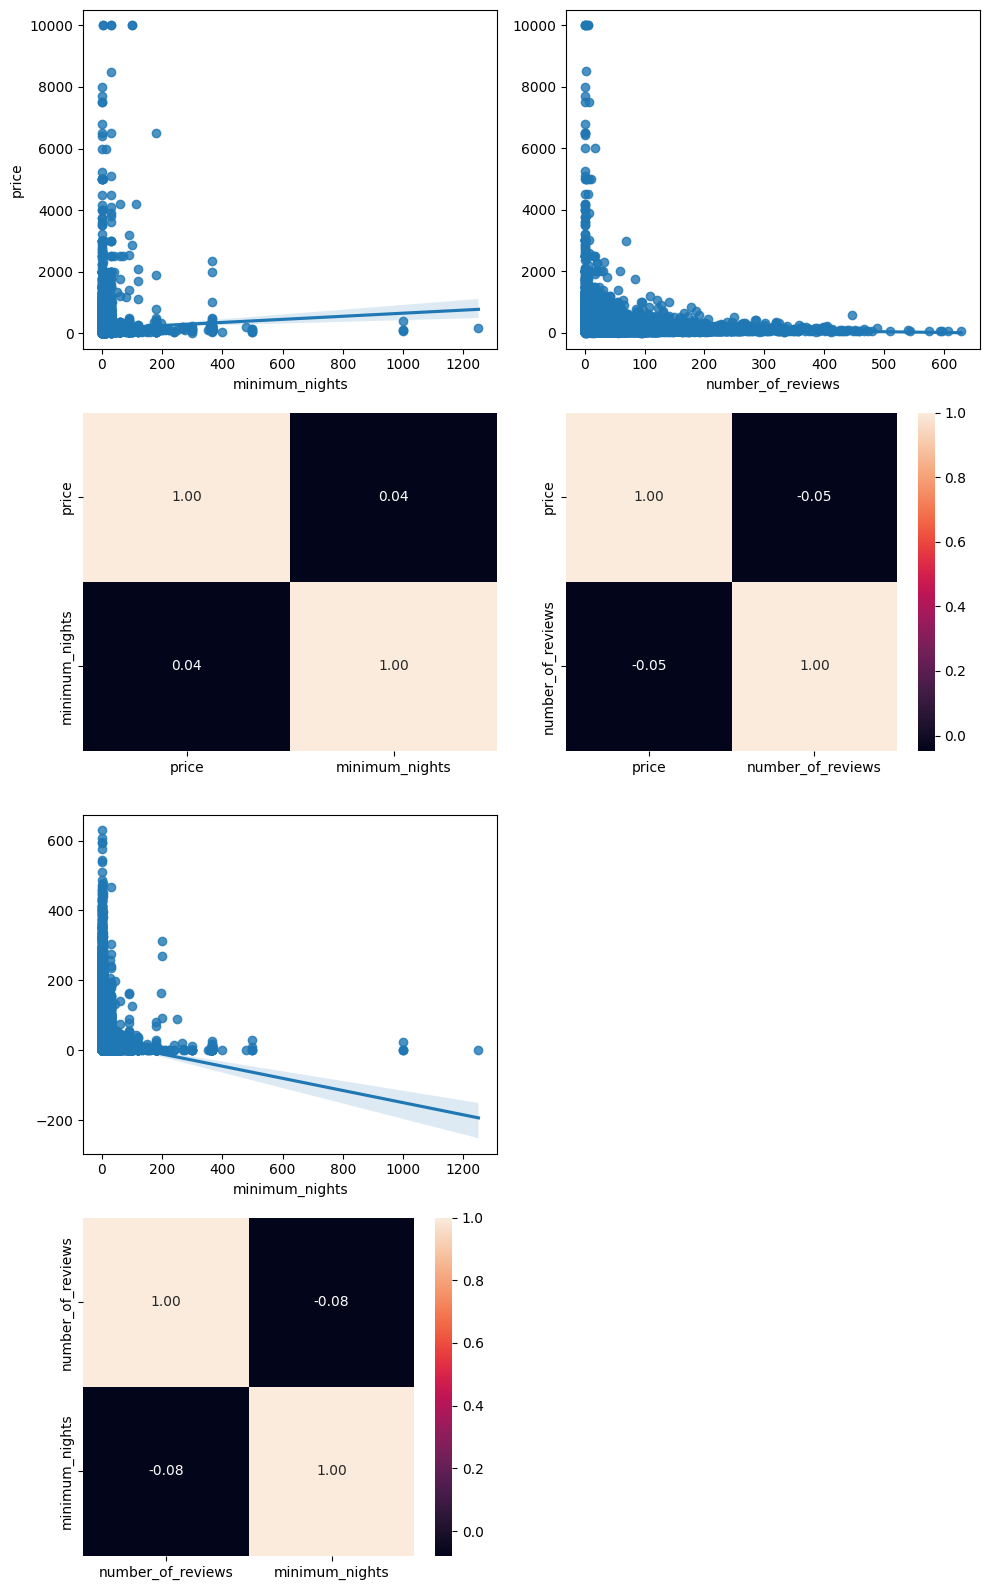

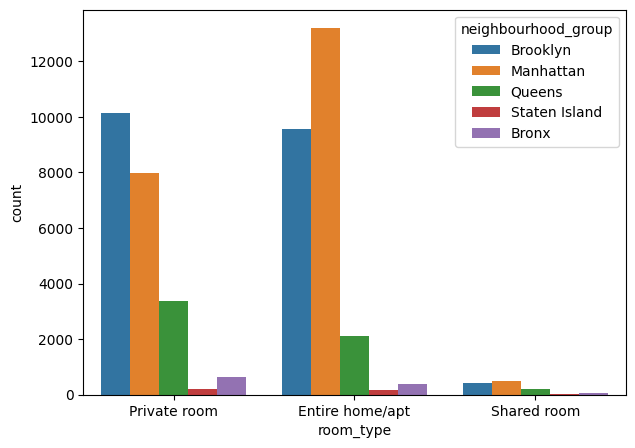

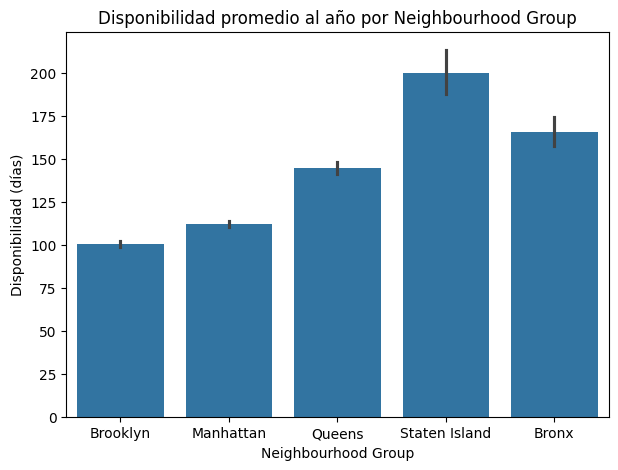

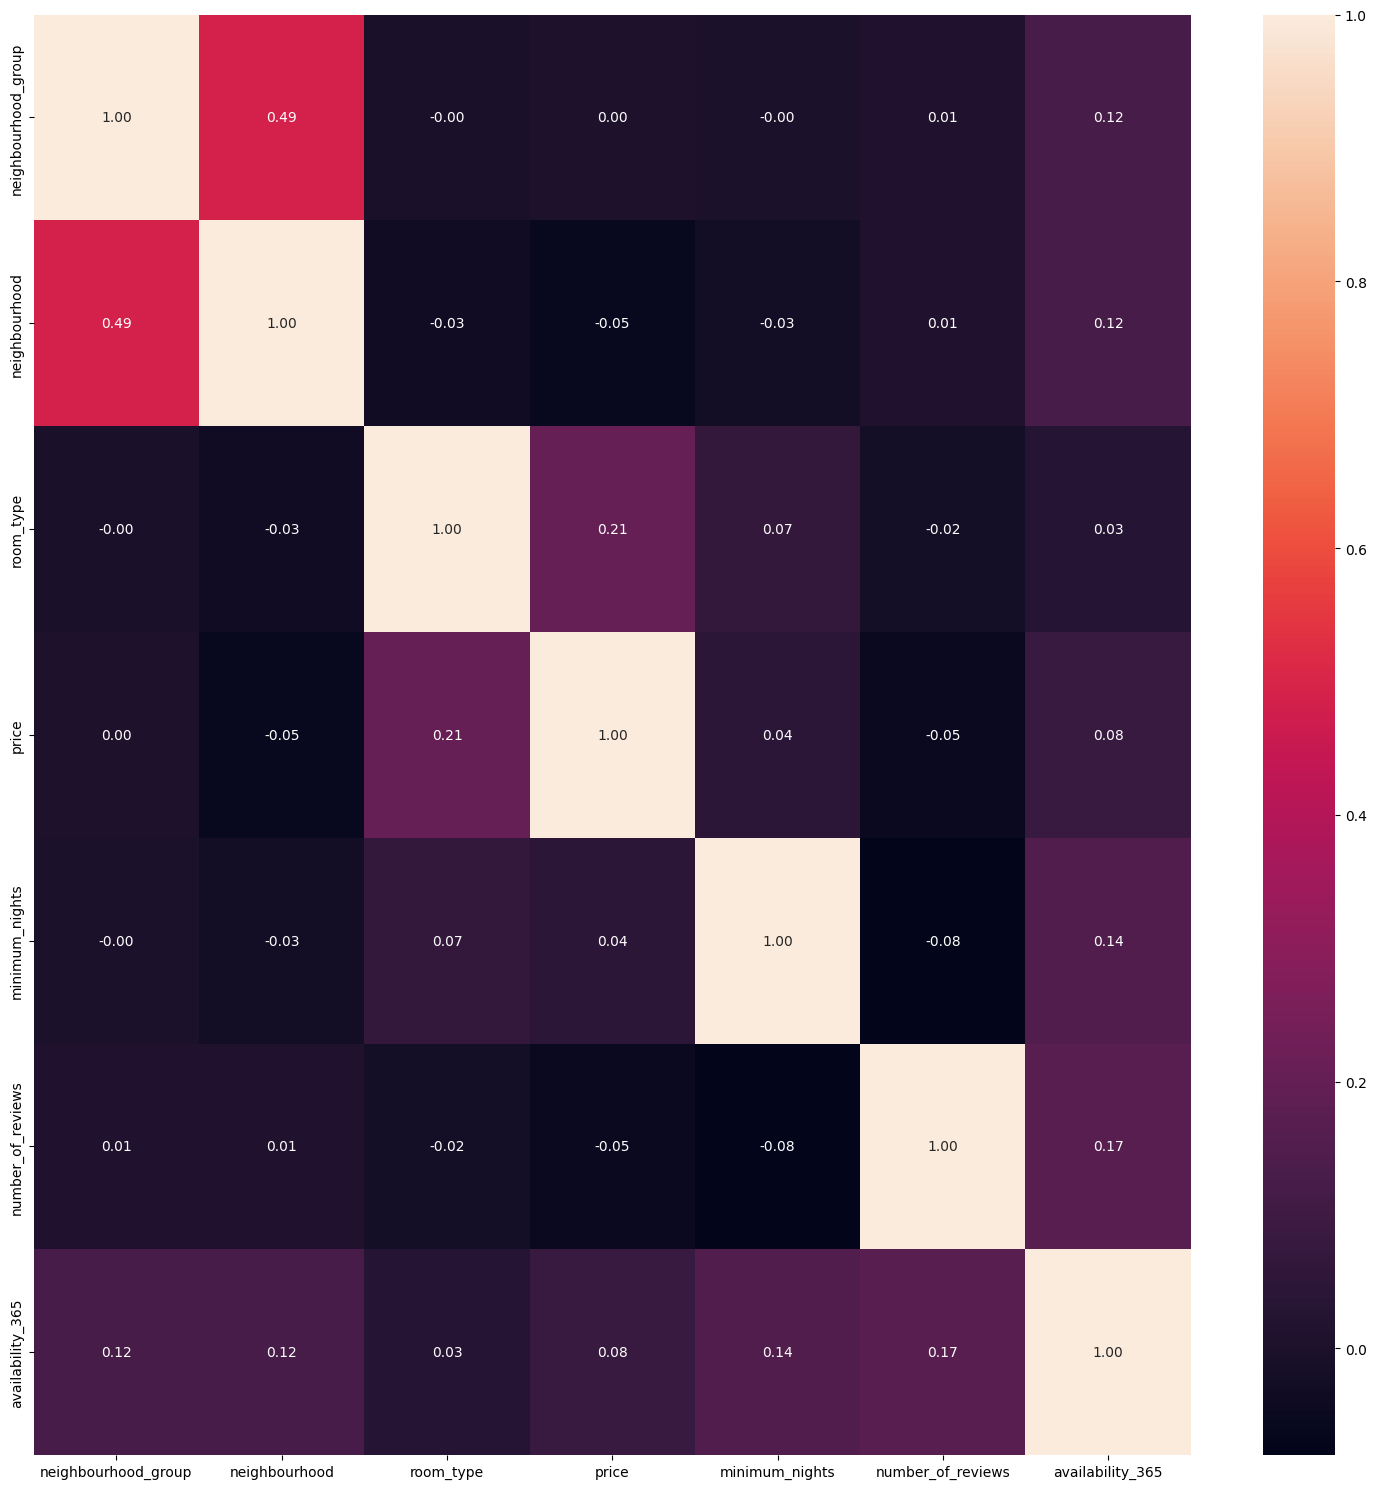

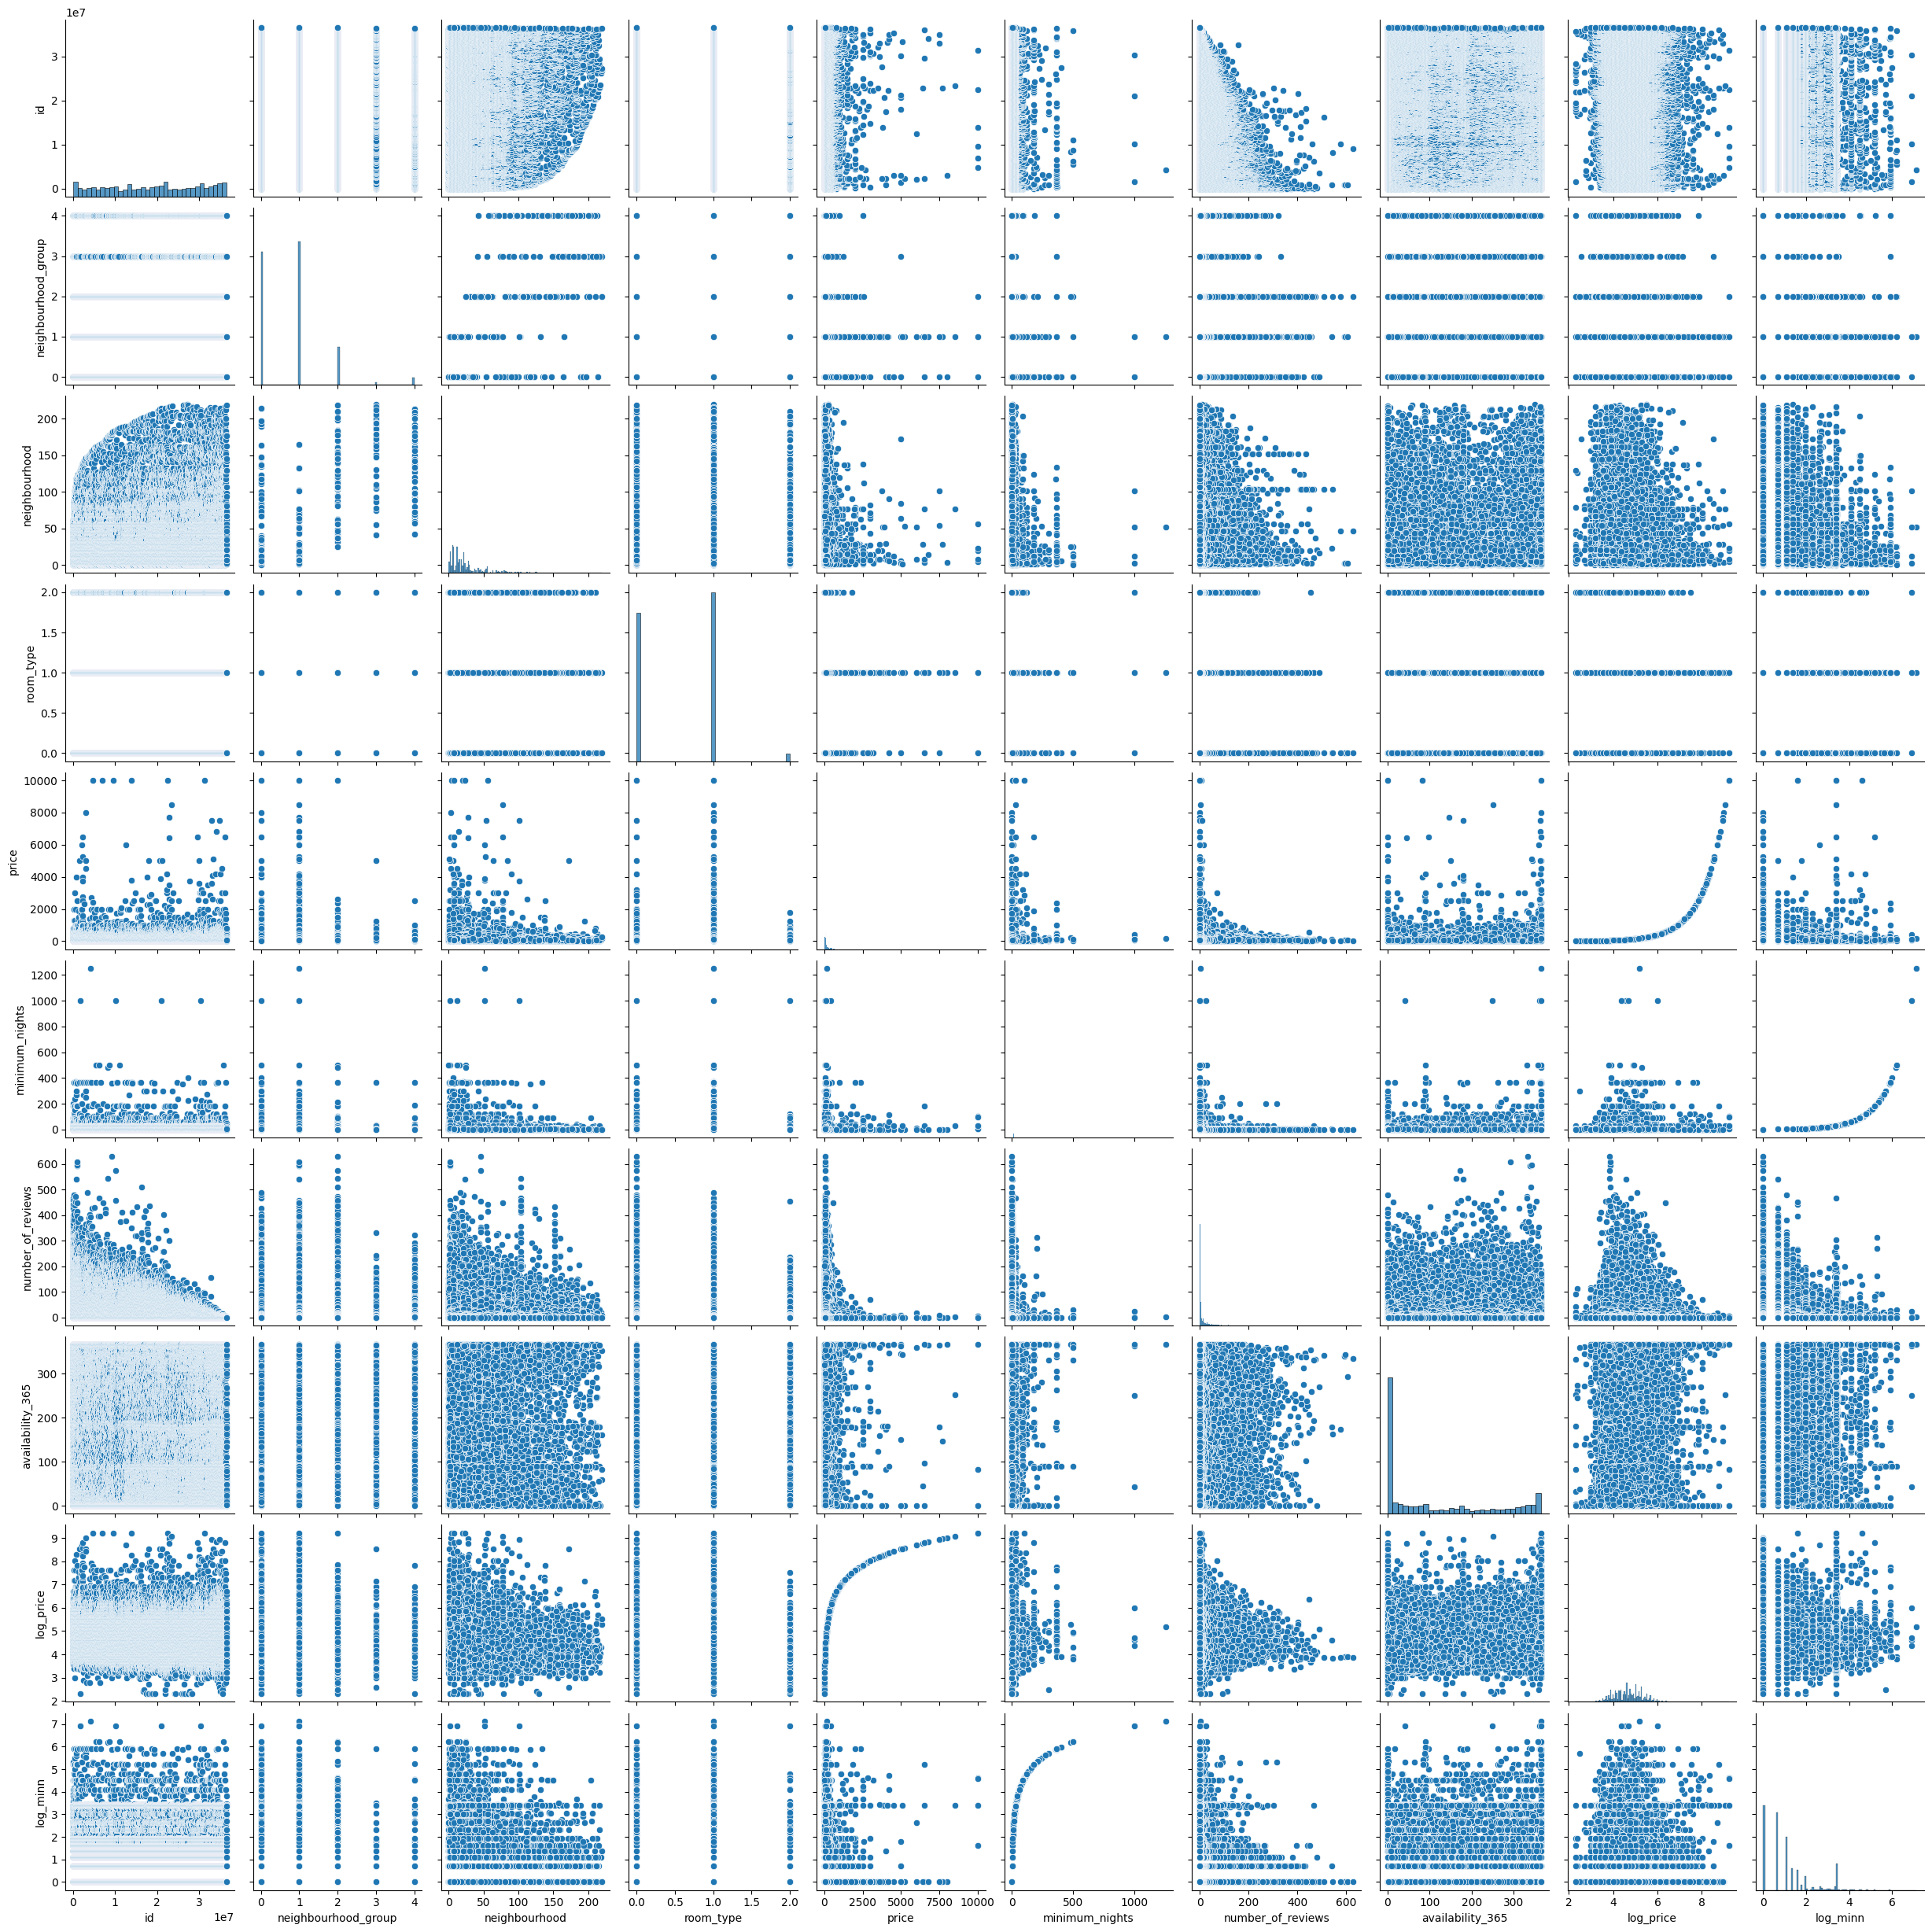

In [24]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import missingno as msno 
import seaborn as sns
import statsmodels.api as sm

datos = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
#datos.head()



#datos.info()
#datos.nunique()

#Con datos.info() ya veo que hay varias columnas con Nans: name, host_name, last_review y reviews_per_month.

datos_util = datos.drop(["name", "host_id", "latitude", "longitude", "host_name", "last_review", "reviews_per_month", "calculated_host_listings_count"], axis = 1)

#datos_util.info()

#Como todas las columnas tienen 48895 entradas, no tengo que revisar que hayan valores vacíos, pero lo compruebo:

msno.matrix(datos_util)

#Confirmado 

datos_util.nunique()
#Representación de variables no numéricas 

fig, axis = plt.subplots(2, 2, figsize=(15, 7))


sns.histplot(ax = axis[0,0], data = datos_util, x = "neighbourhood_group")
sns.histplot(ax = axis[0,1], data = datos_util, x = "neighbourhood").set_xticks([])
sns.histplot(ax = axis[1,0], data = datos_util, x = "room_type")
sns.histplot(ax = axis[1,1], data = datos_util, x = "availability_365")
plt.show()

#Representación de variables numéricas 
datos_util["log_price"]=np.log(datos.price)
datos_util["log_minn"]=np.log(datos.minimum_nights)


fig, axis = plt.subplots(2, 2, figsize = (15, 7))

sns.histplot(ax = axis[0, 0], data = datos_util, x = "log_price")
sns.boxplot(ax = axis[1, 0], data = datos_util, x = "log_price")

sns.histplot(ax = axis[0, 1], data = datos_util, x = "log_minn")
sns.boxplot(ax = axis[1, 1], data = datos_util, x = "log_minn")


plt.show()

#Análisis de bivariables:

#Numéricas:

fig, axis = plt.subplots(4, 2, figsize = (10, 16))


sns.regplot(ax = axis[0, 0], data = datos_util, x = "minimum_nights", y = "price")
sns.heatmap(datos_util[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = datos_util, x = "number_of_reviews", y = "price").set(ylabel = None)
sns.heatmap(datos_util[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = datos_util, x = "minimum_nights", y = "number_of_reviews").set(ylabel = None)
sns.heatmap(datos_util[["number_of_reviews", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0]).set(ylabel = None)
fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])


plt.tight_layout()


plt.show()

#No existe correlación precio-noches mínimas, precio-reviews ni tampoco entre noches mínimas-reviews

#Categóricas:

fig, axis = plt.subplots(figsize = (7, 5))
sns.countplot(data = datos_util, x = "room_type", hue = "neighbourhood_group")
plt.show()
#Manhathan presenta la mayoría de alojamientos, seguido por Brooklyn. Staten Island apenas tiene oferta. El tipo de alojamiento mayoritariamente ofrecido es de apartamento completo y su máxima representación está en Manhattan, seguido de habitación privada en Brooklyn

plt.figure(figsize=(7, 5))
sns.barplot(x="neighbourhood_group", y="availability_365", data=datos_util)
plt.title("Disponibilidad promedio al año por Neighbourhood Group")
plt.ylabel("Disponibilidad (días)")
plt.xlabel("Neighbourhood Group")
plt.show()
#El barrio con mayor disponibilidad media al año es Staten Island con más de 200 noches, seguida por el Bronx y en último lugar Manhattan con menos de 100 noches.


#Análisis de todas las variables por mapa de calor:

datos_util["room_type"] = pd.factorize(datos_util["room_type"])[0]
datos_util["neighbourhood_group"] = pd.factorize(datos_util["neighbourhood_group"])[0]
datos_util["neighbourhood"] = pd.factorize(datos_util["neighbourhood"])[0]

fig, axes = plt.subplots(figsize=(15, 15))
sns.heatmap(datos_util[["neighbourhood_group", "neighbourhood", "room_type", "price", "minimum_nights",	"number_of_reviews", "availability_365"]].corr(), annot = True, fmt = ".2f")
plt.tight_layout()
plt.show()

#No existe correlación fuerte entre ninguna variable

#Análisis de todas las variables a la vez:
sns.pairplot(data = datos_util)


#Detecctión de outliers y valores influyentes:

X = datos_util.drop(["log_price"], axis=1)
y = datos_util.log_price

# Ajusta el modelo
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Instancia de la influencia y obtención de la distancia de cook para cada observación
cooks_distance = model.get_influence().cooks_distance

plt.scatter(datos_util.log_price, cooks_distance[0])
plt.xlabel('x')
plt.ylabel('Cooks Distance')
plt.show()
